In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

pumpkins = pd.read_csv('../../2-Regression/data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.head()
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [9]:
col_select = ['Package', 'Variety', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, col_select]

In [10]:
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month
day = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt - datetime(dt.year, 1, 1)).days)

In [20]:
new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'],'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins.insert(1, 'DayofYear', day)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price / (1 + 1/ 9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price / (1/2)
new_pumpkins.head()

,Month,DayofYear,Variety,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,267,PIE TYPE,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,274,PIE TYPE,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,274,PIE TYPE,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,281,PIE TYPE,1 1/9 bushel cartons,15.0,15.0,13.5


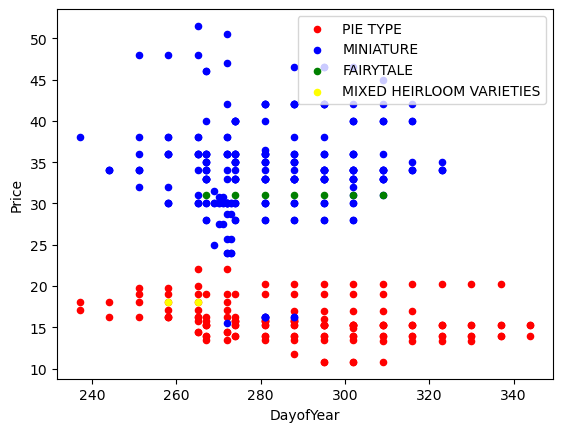

In [22]:
ax = None
colors = ['red','blue','green','yellow']
for i, var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety'] == var]
    ax = df.plot.scatter('DayofYear', 'Price', ax = ax, c = colors[i], label = var)

<AxesSubplot:xlabel='Variety'>

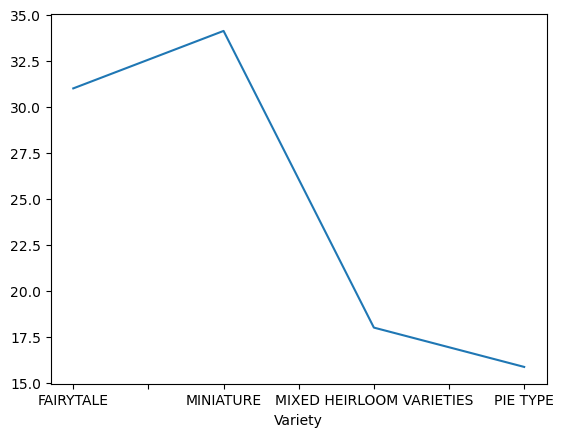

In [28]:
new_pumpkins.groupby('Variety')['Price'].mean().plot()

In [37]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety'] == 'PIE TYPE']
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayofYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   Package     144 non-null    object 
 4   Low Price   144 non-null    float64
 5   High Price  144 non-null    float64
 6   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.0+ KB


In [35]:
pie_pumpkins.dropna(inplace=True)
pie_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 70 to 1630
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       144 non-null    int64  
 1   DayofYear   144 non-null    int64  
 2   Variety     144 non-null    object 
 3   Package     144 non-null    object 
 4   Low Price   144 non-null    float64
 5   High Price  144 non-null    float64
 6   Price       144 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 9.0+ KB


C:\Users\31225\AppData\Local\Temp\ipykernel_27556\3144308612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_pumpkins.dropna(inplace=True)
